In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from summarytools import dfSummary
import matplotlib as mpl

### 1. Load and inspect data.

In [2]:
df = pd.read_csv("../../urine_test_data.csv")
df

,Sample_ID,Organism_1,Organism_2,Organism_3,Organism_4,Organism_5,Organism_6,Organism_7,Organism_8,Organism_9,...,Antibiotic_13,Antibiotic_14,Antibiotic_15,Antibiotic_16,Antibiotic_17,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5
0,Sample_0001,675,291,0,204,666,0,0,0,799,...,S,S,R,S,S,0,0,0,0,0
1,Sample_0002,692,377,0,0,0,971,0,0,0,...,R,R,S,S,S,0,1,0,0,0
2,Sample_0003,0,173,0,0,0,25,0,0,0,...,S,R,S,S,S,0,0,0,0,0
3,Sample_0004,811,0,710,0,0,0,0,485,0,...,S,S,R,S,R,0,0,0,0,0
4,Sample_0005,708,553,0,0,0,0,0,0,0,...,S,S,R,S,S,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sample_0996,57,0,0,670,0,0,0,0,0,...,S,S,R,S,S,0,0,0,0,0
996,Sample_0997,221,0,207,0,0,0,506,0,0,...,S,S,R,S,S,0,0,0,0,0
997,Sample_0998,0,0,0,0,0,0,0,0,0,...,S,S,R,R,S,0,0,0,0,0
998,Sample_0999,0,574,0,0,0,0,0,817,0,...,R,S,R,S,S,0,1,0,0,0


In [3]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Sample_ID[object],1. Sample_00012. Sample_06723. Sample_06594. Sample_06605. Sample_06616. Sample_06627. Sample_06638. Sample_06649. Sample_066510. Sample_066611. other,1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)990 (99.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyy8zcz8zt3g/hqn1s2/Z2eHh4+Ho8Hs97v4brta7ry7Is3w7H4/H89PT0djqd3vd+FNfn9fX17nK5nJ+fn28PMzOn0+n98fHxx94P42rdz/iBQEhsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuYw8/szkL0fwnX6u63Duq4vl8vlPH8+A4F/bV3Xl5n58Fk4hY9t296sq8j4gUBGbGTERkZsZMRGRmxkxEZGbGTERuYXwgdpOf758ysAAAAASUVORK5CYII="">",0(0.0%)
2,Organism_1[int64],Mean (sd) : 190.5 (306.9)min < med < max:0.0 < 0.0 < 999.0IQR (CV) : 350.2 (0.6),320 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACgUlEQVR4nO3XsW/aQBiG8e8gQeeQ2iJQ2Fg6VuqAlCVLt475Y7N2J1LnDF06ZYkiIWMLJwiLulO7VE3wHYS+0vNb4Tvusx6BcE3TGPC/6xz7AsAuTl57g3MuMbNe4PmbpmmeA2eBP14M1TmXDIfD6zRNByGHl2WZO+duiBWxXvtG7aVpOri6unrOsmzd5uCiKPx8Ph8sFouemREqorz6029mlmXZejwePwWcnwTMAH/hzxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECoknBzy8O12e2pmqXMu9IhN0zTPe7zSzpxziZn1Asc7ZvYzcDZq5yPeO3b+xb0PFmpVVad1XX+aTqfdbre7DjljuVyunHNfzSxkPuah+YuLiy9ZlvXbDm6329Oqqj6cn5//6HQ6ddv5yJ2Pdu/Y+bIsc+fczb9iPViom83mxHt/NpvN1pPJJG87//Dw8O729vbzdDodtQ099qHVde3N7OPl5eW30WhUtpm9v78f3N3dvZ/NZt/b7h2zs9nx7h07XxSFn8/ng8Vi0TOztw31t36/vx6Px09t5/I8T0JD39NDP/Pe123vnud5Yha2d8zOZse79z7mzSx56cWdQi2Kwrf91NVq5c3Mqqryj4+PZ6HzxxRy95i997XzW987dn6Xvn4Bzjwfok4kl08AAAAASUVORK5CYII="">",0(0.0%)
3,Organism_2[int64],Mean (sd) : 182.7 (297.1)min < med < max:0.0 < 0.0 < 997.0IQR (CV) : 358.0 (0.6),300 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfElEQVR4nO3Xv2/aQBiH8feAIPOjtkgobCwdK3VAypKlW8f+sVm7G6kzQ5dOLAjJMrZwQFjUnVJVqprE51D6lZ7PSt670/kxKK6qKgP+d61LHwB4ic5zf+Cc65lZ13P9Y1VVe89Z4JcnQ3XO9W5ubj6HYTjyWTzP89Q5d0+saOq5b9RuGIaju7u7fRRFhzoLZ1kWxHE8SpKka2aEikae/ek3M4ui6DCZTB481u95zAB/4J8pSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSOhc+gDn4pzrmVm3wRItM/shNmtmdqyqat9g3lvDO3/y3GcN9XQ6XZlZ6JzzXcL3oQXX19efoiga+Gx6Op2uiqJ4NxwOv7darVJh9tF2u905576Y2cFjvMlL0ujO8zxPnXP3f4v1bKEWRXFVluWH2WzWbrfbtS+tyUMryzIws/e3t7dfx+NxXnfv1Wo1Wi6Xb+fz+bfpdJoqzJqZrdfrN4vF4uNsNhvXvfOmL0mTO8+yLIjjeJQkSdfM/m2ox+OxEwRB

dfSummary shows there are no missing values and the data are the correct types.

### 2. Visualize the percentage of samples resistant (R) and sensitive (S) to each antibiotic.

In [4]:
antibiotic_columns = ["Antibiotic_"+str(i) for i in range(1,18)] # columns to plot
# df2 stores the percentages of samples resistant and sensitive to each antibiotic
df2 = df[antibiotic_columns].apply(pd.Series.value_counts,normalize=True).reset_index()
df2

,index,Antibiotic_1,Antibiotic_2,Antibiotic_3,Antibiotic_4,Antibiotic_5,Antibiotic_6,Antibiotic_7,Antibiotic_8,Antibiotic_9,Antibiotic_10,Antibiotic_11,Antibiotic_12,Antibiotic_13,Antibiotic_14,Antibiotic_15,Antibiotic_16,Antibiotic_17
0,R,0.902,0.842,0.832,0.787,0.72,0.679,0.634,0.592,0.556,0.488,0.454,0.435,0.396,0.333,0.293,0.241,0.223
1,S,0.098,0.158,0.168,0.213,0.28,0.321,0.366,0.408,0.444,0.512,0.546,0.565,0.604,0.667,0.707,0.759,0.777


In [5]:
# melt the dataframe from wide to long for plotting purposes
df3 = pd.melt(df2, id_vars=['index'], value_vars=antibiotic_columns)
df3.head()

,index,variable,value
0,R,Antibiotic_1,0.902
1,S,Antibiotic_1,0.098
2,R,Antibiotic_2,0.842
3,S,Antibiotic_2,0.158
4,R,Antibiotic_3,0.832


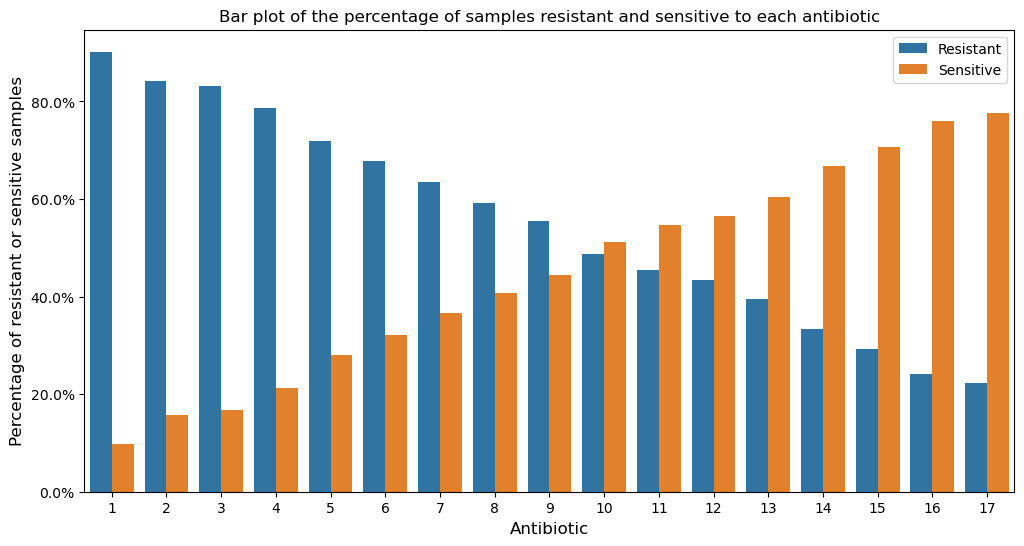

In [6]:
# plot a bar plot
# Bar graphs are used to compare things between different groups.
plt.figure(figsize=(12,6))
ax = sns.barplot(x='variable', y='value', data=df3, hue='index')
plt.xlabel('Antibiotic', size = 12)
plt.ylabel('Percentage of resistant or sensitive samples', size = 12)
plt.title("Bar plot of the percentage of samples resistant and sensitive to each antibiotic")

# customize legend labels
labels=['Resistant','Sensitive']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels)

# customize x axis ticks
labels = range(1,18)
ax.set_xticklabels(labels)

# format y axis as percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0, decimals=1))

plt.show()

### 3. Visualize the presence of each resistance gene across the samples.

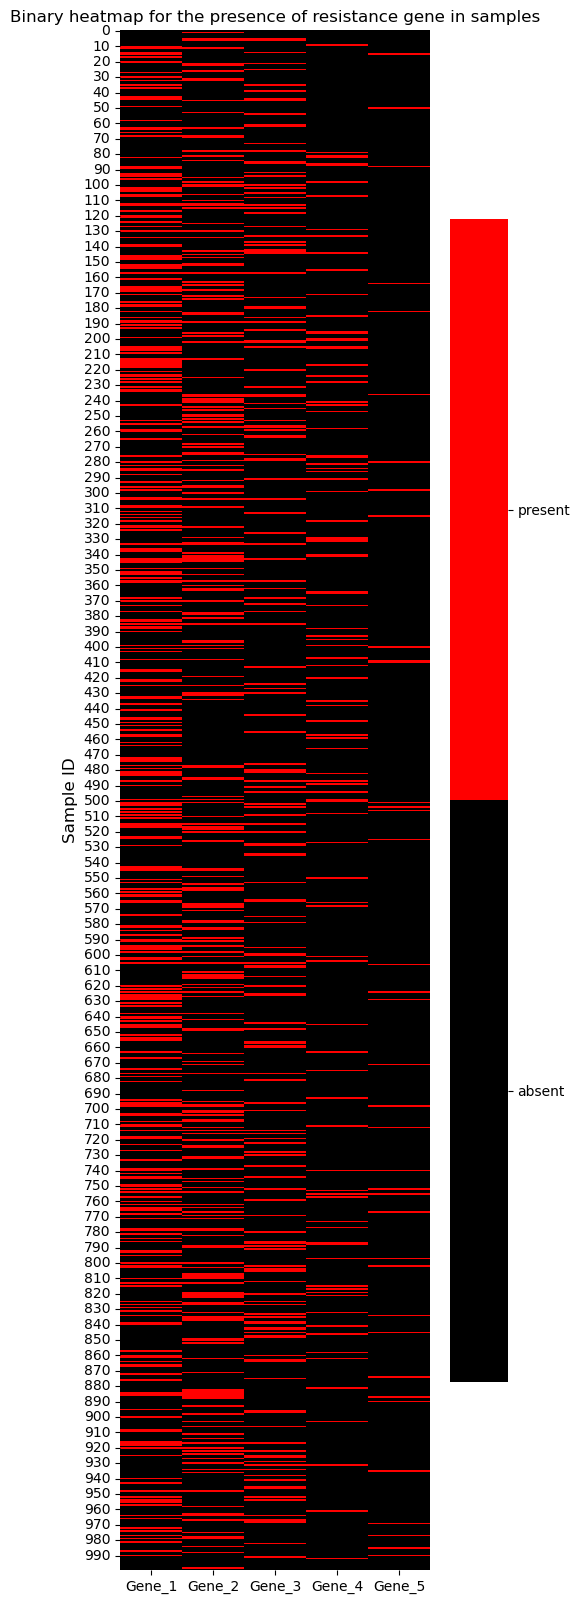

In [7]:
gene_columns = ['Gene_'+str(i) for i in range(1,6)] # columns to plot

# customize color map
cmap = mpl.colors.ListedColormap(['k', 'r'])

# plot a binary heatmap
# A binary heatmap depicts values for a main binary variable of interest ("R" of "S") across two axis variables (samples and genes)
plt.figure(figsize=(5,20))
ax = sns.heatmap(df[gene_columns],cmap=cmap)
plt.ylabel('Sample ID', size = 12)
plt.title("Binary heatmap for the presence of resistance gene in samples")

# set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['absent', 'present'])

### 4. Visualize the distribution of cell counts for each organism.

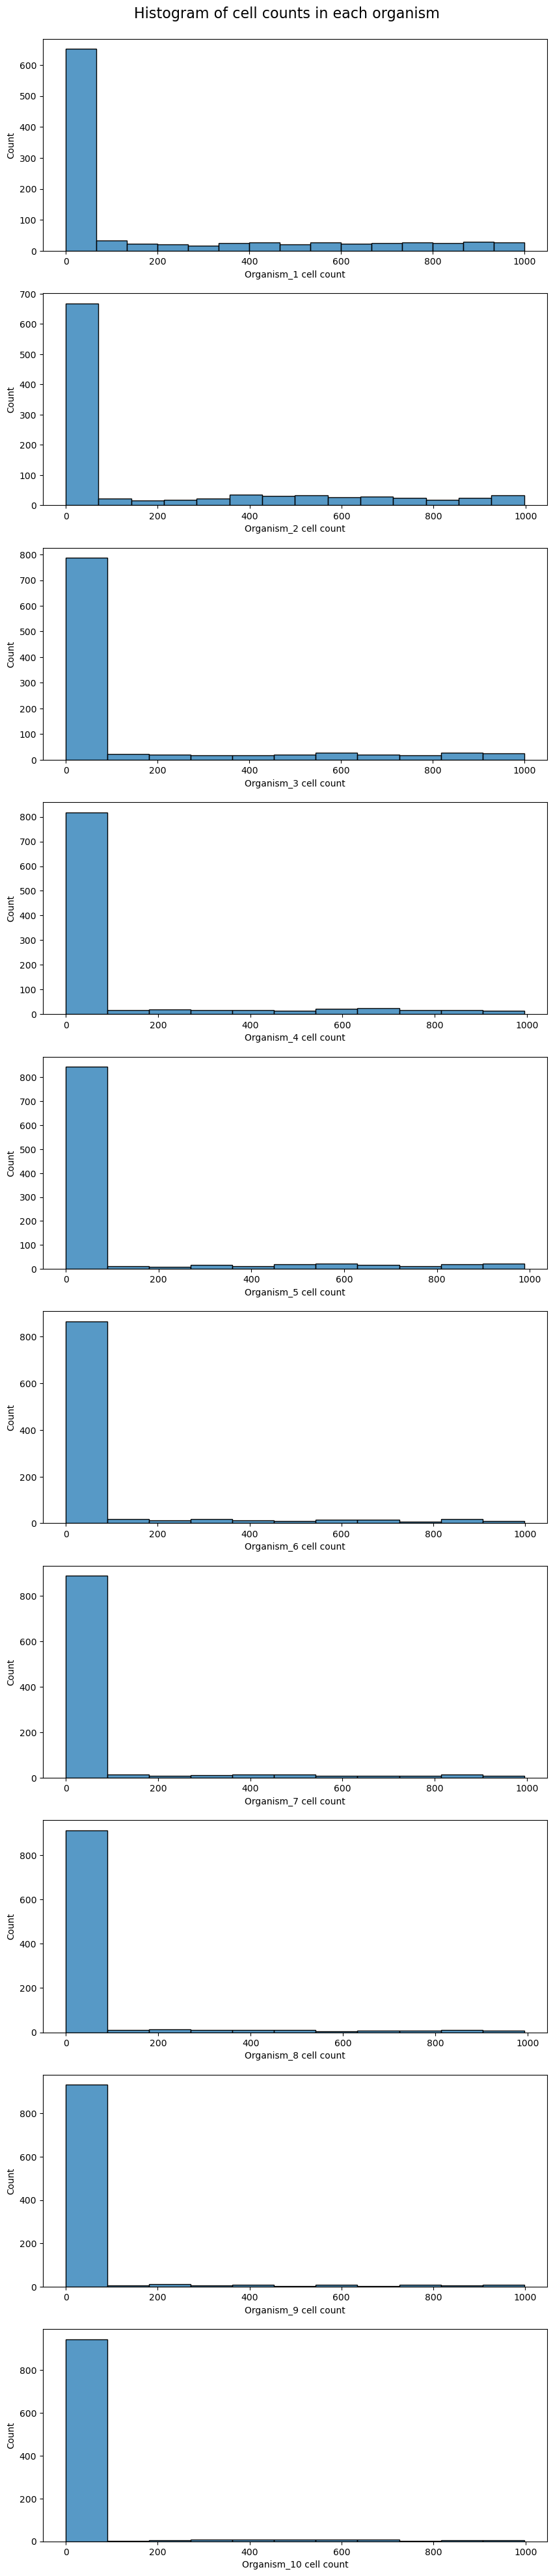

In [8]:
organism_columns = ['Organism_'+str(i) for i in range(1,11)] # columns to plot

n_height = len(organism_columns) # number of images vertically
n_width = 1 # number of images horizontally
figure_size = (10,50) # figure size

# define subplots and main title
fig, ax = plt.subplots(n_height, n_width, figsize=figure_size)
fig.suptitle("Histogram of cell counts in each organism", fontsize=16, y=0.89)

# iterate to plot each histogram
# Histogram is used to visualize the distribution of a continuous variable.
for i in range(n_height):
    col = organism_columns[i]
    sns.histplot(data=df,x=col,ax = ax[i])
    ax[i].set_xlabel(f'Organism_{i+1} cell count')